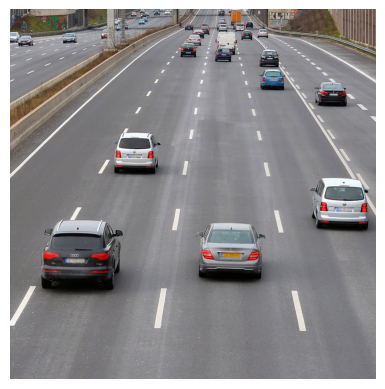

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

cars = cv2.imread('../04-files/cars.jpg')
plt.imshow(cars[:,:,::-1])
plt.axis('off');

In [68]:
def show_img(img, ax=None, figsize=(10, 8)):
    if not ax: _, ax  = plt.subplots(1,1, figsize=figsize)
    if len(img.shape) == 2: img = np.tile(img[:,:,None], 3)
    ax.imshow(img[:, :, ::-1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

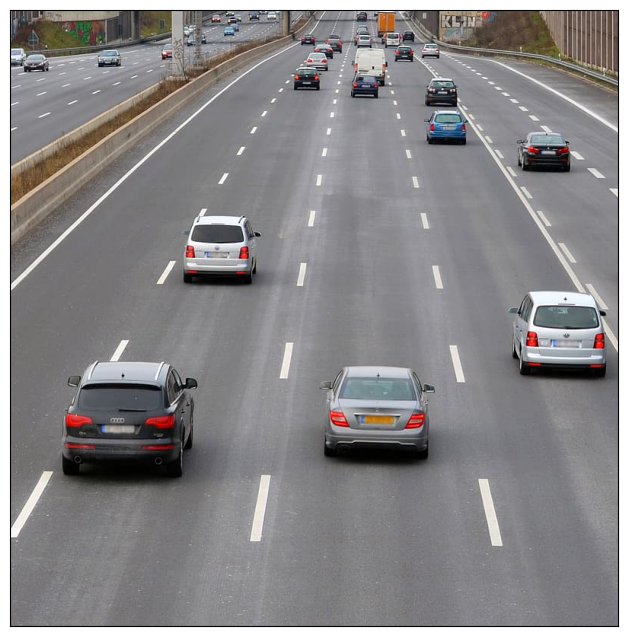

In [69]:
show_img(cars);

In [84]:
cars2 = cars.copy()
imgray = cv2.cvtColor(cars2, cv2.COLOR_BGR2GRAY)

# Threshold grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # find contours version 4 returns contours and hierarchy
size_threshold = 20000

'''
Iterate through all contours and use the threshold as checkpoint for contour min area
'''
output_contours = []
for contour in contours:
    if cv2.contourArea(contour) > size_threshold:
        x, y, w, h = cv2.boundingRect(contour)
        output_contours.append((x, y, w, h))
        print(f'Width : {w} pixels x height : {h} pixels x area : {w*h}')

        cv2.rectangle(cars2, (x, y), (x+w, y+h), (0, 255, 0), 2)


Width : 177 pixels x height : 237 pixels x area : 41949
Width : 800 pixels x height : 810 pixels x area : 648000
Width : 298 pixels x height : 221 pixels x area : 65858


In [85]:
print(f'Total number of contours: {len(output_contours)}')

Total number of contours: 3


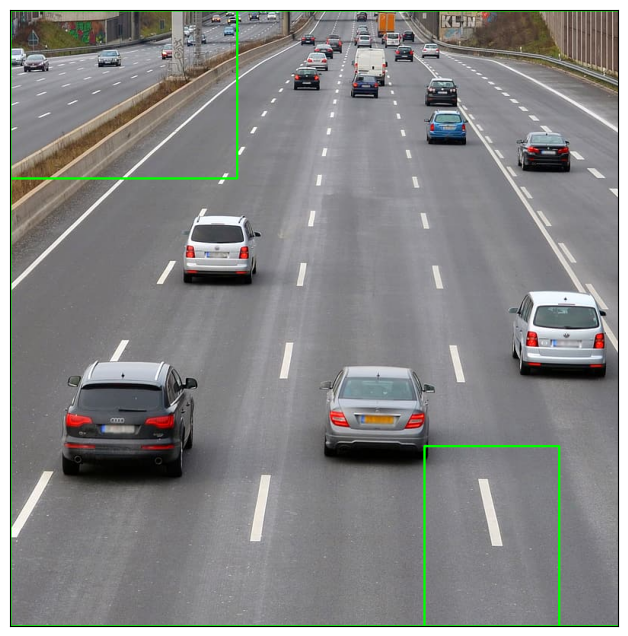

In [86]:
show_img(cars2);